# Introduction

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

# Pre-processing

In [ ]:
# loading our databases
BigCluster = np.load('cluster1_nodispersion.npz') # training
SmallCluster = np.load('cluster0_nodispersion.npz') # synthetic test 
RealCluster = np.load('ngc330_be.npz') # real test

In [ ]:
# loading the data into arrays, for each radiation filter, for both stars with and without disk
U_Big_p = BigCluster['u_phot']
G_Big_p = BigCluster['g_phot']
R_Big_p = BigCluster['r_phot']
I_Big_p = BigCluster['i_phot']
Z_Big_p = BigCluster['z_phot']
J378_Big_p = BigCluster['j378_phot']
J395_Big_p = BigCluster['j395_phot']
J410_Big_p = BigCluster['j410_phot']
J430_Big_p = BigCluster['j430_phot']
J515_Big_p = BigCluster['j515_phot']
J660_Big_p = BigCluster['j660_phot']
J861_Big_p = BigCluster['j861_phot']
Bool_Big_p = np.zeros_like(U_Big_p) # array of zeros for stars without disk
U_Big_d = BigCluster['u_disk']
G_Big_d = BigCluster['g_disk']
R_Big_d = BigCluster['r_disk']
I_Big_d = BigCluster['i_disk']
Z_Big_d = BigCluster['z_disk']
J378_Big_d = BigCluster['j378_disk']
J395_Big_d = BigCluster['j395_disk']
J410_Big_d = BigCluster['j410_disk']
J430_Big_d = BigCluster['j430_disk']
J515_Big_d = BigCluster['j515_disk']
J660_Big_d = BigCluster['j660_disk']
J861_Big_d = BigCluster['j861_disk']
Bool_Big_d = np.ones_like(U_Big_d) # array of ones for stars with disk

In [ ]:
# grouping a database for stars with and without disk
Phot = np.column_stack((U_Big_p, G_Big_p, R_Big_p, I_Big_p, Z_Big_p, J378_Big_p, J395_Big_p, J410_Big_p, J430_Big_p, J515_Big_p, J660_Big_p, J861_Big_p, Bool_Big_p))
Disk = np.column_stack((U_Big_d, G_Big_d, R_Big_d, I_Big_d, Z_Big_d, J378_Big_d, J395_Big_d, J410_Big_d, J430_Big_d, J515_Big_d, J660_Big_d, J861_Big_d, Bool_Big_d))

In [ ]:
# Downsampling to balance the classes
np.random.seed(0); DSIndex = np.random.choice(len(Phot), size = len(Disk), replace = False)
PhotDownSampled = Phot[DSIndex]
# putting together the training base
Training_DB = np.concatenate((PhotDownSampled, Disk))

In [ ]:
# splitting between features and targets
X_Train = Training_DB[:, 0:12]
Y_Train = Training_DB[:, 12]

In [ ]:
# creating a database without downsampling
Train_No_DownSample = np.concatenate((Phot, Disk))

In [ ]:
# splitting between features and targets
X_NoDS_Train = Train_No_DownSample[:, 0:12]
Y_NoDS_Train = Train_No_DownSample[:, 12]

In [ ]:
# repeating the procedure for the synthetic test database
U_Test_p = SmallCluster['u_phot']
G_Test_p = SmallCluster['g_phot']
R_Test_p = SmallCluster['r_phot']
I_Test_p = SmallCluster['i_phot']
Z_Test_p = SmallCluster['z_phot']
J378_Test_p = SmallCluster['j378_phot']
J395_Test_p = SmallCluster['j395_phot']
J410_Test_p = SmallCluster['j410_phot']
J430_Test_p = SmallCluster['j430_phot']
J515_Test_p = SmallCluster['j515_phot']
J660_Test_p = SmallCluster['j660_phot']
J861_Test_p = SmallCluster['j861_phot']
Bool_Test_p = np.zeros_like(U_Test_p)
U_Test_d = SmallCluster['u_disk']
G_Test_d = SmallCluster['g_disk']
R_Test_d = SmallCluster['r_disk']
I_Test_d = SmallCluster['i_disk']
Z_Test_d = SmallCluster['z_disk']
J378_Test_d = SmallCluster['j378_disk']
J395_Test_d = SmallCluster['j395_disk']
J410_Test_d = SmallCluster['j410_disk']
J430_Test_d = SmallCluster['j430_disk']
J515_Test_d = SmallCluster['j515_disk']
J660_Test_d = SmallCluster['j660_disk']
J861_Test_d = SmallCluster['j861_disk']
Bool_Test_d = np.ones_like(U_Test_d)

In [ ]:
# no need to downsample our test database
Test_Phot = np.column_stack((U_Test_p, G_Test_p, R_Test_p, I_Test_p, Z_Test_p, J378_Test_p, J395_Test_p, J410_Test_p, J430_Test_p, J515_Test_p, J660_Test_p, J861_Test_p, Bool_Test_p))
Test_Disk = np.column_stack((U_Test_d, G_Test_d, R_Test_d, I_Test_d, Z_Test_d, J378_Test_d, J395_Test_d, J410_Test_d, J430_Test_d, J515_Test_d, J660_Test_d, J861_Test_d, Bool_Test_d))

Test_DB = np.concatenate((Test_Phot, Test_Disk))

In [ ]:
# splitting between features and targets for the synthetic database
X_Test = Test_DB[:, 0:12]
Y_Test = Test_DB[:, 12]

In [ ]:
# separating into arrays the database from the cluster NGC330
U_Test_True = RealCluster['u']
G_Test_True = RealCluster['g']
R_Test_True = RealCluster['r']
I_Test_True = RealCluster['i']
Z_Test_True = RealCluster['z']
J378_Test_True = RealCluster['j378']
J395_Test_True = RealCluster['j395']
J410_Test_True = RealCluster['j410']
J430_Test_True = RealCluster['j430']
J515_Test_True = RealCluster['j515']
J660_Test_True = RealCluster['j660']
J861_Test_True = RealCluster['j861']
Y_Test_True = RealCluster['be']

In [ ]:
# stacking the whole real test database
X_Test_True = np.column_stack((U_Test_True, G_Test_True, R_Test_True, I_Test_True, Z_Test_True, J378_Test_True, J395_Test_True, J410_Test_True, J430_Test_True, J515_Test_True, J660_Test_True, J861_Test_True))

In [ ]:
# using sklearn to do the scaling of the databases
# we don't scale targets, as it is a boolean variable

ss_train = StandardScaler()
X_Train_Scaled = ss_train.fit_transform(X_Train)

ss_nods_train = StandardScaler()
X_NoDS_Train_Scaled = ss_nods_train.fit_transform(X_NoDS_Train)

ss_test = StandardScaler()
X_Test_Scaled = ss_test.fit_transform(X_Test)

ss_test_true = StandardScaler()
X_Test_True_Scaled = ss_test_true.fit_transform(X_Test_True)

# Training the models

In [ ]:
# creating a dict with the different models we will be testing
models = {}
models['Logistic Regression'] = LogisticRegression()
models['Support Vector Machines'] = LinearSVC()
models['Decision Trees'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [ ]:
# training the model, with downsampled database, testing on the synthetic cluster

accuracy, precision, recall, fmeasure = {}, {}, {}, {}

for key in models.keys():
    
    # model training
    models[key].fit(X_Train_Scaled, Y_Train)
    
    # generating prediction
    predictions = models[key].predict(X_Test_Scaled)
    
    # calculating metrics
    accuracy[key] = accuracy_score(predictions, Y_Test)
    precision[key] = precision_score(predictions, Y_Test)
    recall[key] = recall_score(predictions, Y_Test)
    fmeasure[key] = f1_score(predictions, Y_Test)

# visualizing the metrics for this test
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F-Measure'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F-Measure'] = fmeasure.values()
df_model

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


,Accuracy,Precision,Recall,F-Measure
Logistic Regression,0.949361,1.000000,0.881975,0.937287
Support Vector Machines,1.000000,1.000000,1.000000,1.000000
Decision Trees,0.936726,0.952969,0.888015,0.919346
Random Forest,0.961898,0.995193,0.912122,0.951848
Naive Bayes,0.803540,0.978173,0.662939,0.790280
K-Nearest Neighbor,0.983235,0.994543,0.962409,0.978212


In [ ]:
# training the model, without downsampled database, testing on the synthetic cluster

accuracy, precision, recall, fmeasure = {}, {}, {}, {}

for key in models.keys():
    
    # model training
    models[key].fit(X_NoDS_Train_Scaled, Y_NoDS_Train)
    
    # generating prediction
    predictions = models[key].predict(X_Test_Scaled)
    
    # calculating metrics
    accuracy[key] = accuracy_score(predictions, Y_Test)
    precision[key] = precision_score(predictions, Y_Test)
    recall[key] = recall_score(predictions, Y_Test)
    fmeasure[key] = f1_score(predictions, Y_Test)

# visualizing the metrics for this test
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F-Measure'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F-Measure'] = fmeasure.values()
df_model

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


,Accuracy,Precision,Recall,F-Measure
Logistic Regression,0.999902,1.000000,0.999740,0.999870
Support Vector Machines,1.000000,1.000000,1.000000,1.000000
Decision Trees,0.982793,0.979992,0.974674,0.977326
Random Forest,0.996853,0.993504,0.998173,0.995833
Naive Bayes,0.800541,0.893855,0.679842,0.772296
K-Nearest Neighbor,0.997640,0.994933,0.998826,0.996876


In [ ]:
# training the model, with downsampled database, testing on the real cluster

accuracy, precision, recall, fmeasure = {}, {}, {}, {}

for key in models.keys():
    
    # model training
    models[key].fit(X_Train_Scaled, Y_Train)
    
    # generating prediction
    predictions = models[key].predict(X_Test_True_Scaled)
    
    # calculating metrics
    accuracy[key] = accuracy_score(predictions, Y_Test_True)
    precision[key] = precision_score(predictions, Y_Test_True)
    recall[key] = recall_score(predictions, Y_Test_True)
    fmeasure[key] = f1_score(predictions, Y_Test_True)

# visualizing the metrics for this test
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F-Measure'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F-Measure'] = fmeasure.values()
df_model

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


,Accuracy,Precision,Recall,F-Measure
Logistic Regression,0.522225,0.921569,0.013580,0.026765
Support Vector Machines,0.503215,0.921569,0.013066,0.025768
Decision Trees,0.930668,0.137255,0.015251,0.027451
Random Forest,0.939894,0.019608,0.002625,0.004630
Naive Bayes,0.618675,0.784314,0.014509,0.028490
K-Nearest Neighbor,0.890271,0.078431,0.005391,0.010088


In [ ]:
# training the model, without downsampled database, testing on the real cluster

accuracy, precision, recall, fmeasure = {}, {}, {}, {}

for key in models.keys():
    
    # model training
    models[key].fit(X_NoDS_Train_Scaled, Y_NoDS_Train)
    
    # generating prediction
    predictions = models[key].predict(X_Test_True_Scaled)
    
    # calculating metrics
    accuracy[key] = accuracy_score(predictions, Y_Test_True)
    precision[key] = precision_score(predictions, Y_Test_True)
    recall[key] = recall_score(predictions, Y_Test_True)
    fmeasure[key] = f1_score(predictions, Y_Test_True)

# visualizing the metrics for this test
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F-Measure'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F-Measure'] = fmeasure.values()
df_model

,Accuracy,Precision,Recall,F-Measure
Logistic Regression,0.644674,0.843137,0.016686,0.032725
Support Vector Machines,0.560665,0.921569,0.014752,0.029039
Decision Trees,0.930668,0.098039,0.010989,0.019763
Random Forest,0.950937,0.039216,0.006579,0.011268
Naive Bayes,0.678502,0.803922,0.017589,0.034425
K-Nearest Neighbor,0.906206,0.058824,0.004792,0.008863


# Analysis of the models

In [ ]:
# creating the confusion matrix for the SVM model, testing on real data

# training a SVM model, without downsampling
modelSVM = LinearSVC()
modelSVM.fit(X_NoDS_Train_Scaled, Y_NoDS_Train)

# making predictions on the real data
predictions = modelSVM.predict(X_Test_True_Scaled)
PredSynthSVM = modelSVM.predict(X_Test_Scaled)
PredTrueSVM = modelSVM.predict(X_Test_True_Scaled)

# creating the confusion matrix for the predictions
cm = confusion_matrix(Y_Test_True, predictions)
TN, FP, FN, TP = cm.ravel()

# show the values
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

precision = precision_score(predictions, Y_Test_True)
print('Precision of the binary classifier = {:0.3f}'.format(precision))

True Positive(TP)  =  47
False Positive(FP) =  3139
True Negative(TN)  =  3964
False Negative(FN) =  4
Precision of the binary classifier = 0.922


In [ ]:
# creating the confusion matrix for the Random Forerst model, testing on real data

# training a Random Forest model, without downsampling
modelRF = RandomForestClassifier()
modelRF.fit(X_NoDS_Train_Scaled, Y_NoDS_Train)

# making predictions on the real data
predictions = modelRF.predict(X_Test_True_Scaled)
PredSynthRF = modelRF.predict(X_Test_Scaled)

# creating the confusion matrix for the predictions
cm = confusion_matrix(Y_Test_True, predictions)
TN, FP, FN, TP = cm.ravel()

# show the values
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

# the accuracy is the relevant metric for the Random Forest model
accuracy = accuracy_score(predictions, Y_Test_True)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

True Positive(TP)  =  2
False Positive(FP) =  323
True Negative(TN)  =  6780
False Negative(FN) =  49
Accuracy of the binary classifier = 0.948


In [ ]:
modelNB = GaussianNB()
modelNB.fit(X_NoDS_Train_Scaled, Y_NoDS_Train)
PredTrueNB = modelNB.predict(X_Test_True_Scaled)

In [ ]:
# the SVM model doesn't calculate the probability of a data point to belong to a class, it just adjusts
# the best hyperplane that linearly sepparates the classes. So, in order to get the probability that a 
# star is considered a Be star or not, it is needed to use a calibration technique

CLF = CalibratedClassifierCV(modelSVM, method = 'sigmoid', cv = 'prefit')
CLF.fit(X_NoDS_Train_Scaled, Y_NoDS_Train)
candidate_prob = CLF.predict_proba(X_Test_True_Scaled)

# calculates the probability of a star having a disk or not
# the first column is the chance it is a Be, the second is the chance it is not
candidate_prob

array([[9.99999999e-01, 8.25238945e-10],
       [2.59362174e-03, 9.97406378e-01],
       [2.70706198e-05, 9.99972929e-01],
       ...,
       [9.87748883e-01, 1.22511172e-02],
       [9.99999287e-01, 7.12767307e-07],
       [8.58859511e-06, 9.99991411e-01]])

In [ ]:
# defining a variable to help us calculate

chance_de_ser_be = candidate_prob[:, 1]
NormPred = np.zeros_like(chance_de_ser_be)

# defining an arbitrary cut off value
for i in range(len(chance_de_ser_be)):
  if chance_de_ser_be[i] > 0.999:
    NormPred[i] = 1

In [ ]:
# re-calculating the confusion matrix with the new cut off value

cm = confusion_matrix(Y_Test_True, NormPred)
TN, FP, FN, TP = cm.ravel()

# show values
print('Be Confirmada  = ', TP)
print('Previsões Erradas = ', FN)
print('Candidatas = ', FP)
print('Não deve ser Be  = ', TN)

accuracy = accuracy_score(NormPred, Y_Test_True)
precision = precision_score(NormPred, Y_Test_True)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
print('Precision of the binary classifier = {:0.3f}'.format(precision))

Be Confirmada  =  43
Previsões Erradas =  8
Candidatas =  1715
Não deve ser Be  =  5388
Accuracy of the binary classifier = 0.759
Precision of the binary classifier = 0.843


Feature: 0, Score: 0.39700
Standard deviation:  0.00255
Feature: 1, Score: 0.39427
Standard deviation:  0.00336
Feature: 2, Score: 0.01214
Standard deviation:  0.00108
Feature: 3, Score: 0.76351
Standard deviation:  0.00261
Feature: 4, Score: 0.44087
Standard deviation:  0.00294
Feature: 5, Score: 0.25784
Standard deviation:  0.00279
Feature: 6, Score: 0.74914
Standard deviation:  0.00238
Feature: 7, Score: 0.32952
Standard deviation:  0.00291
Feature: 8, Score: 0.00008
Standard deviation:  8e-05
Feature: 9, Score: 0.40080
Standard deviation:  0.00328
Feature: 10, Score: 0.77676
Standard deviation:  0.00263
Feature: 11, Score: 0.77578
Standard deviation:  0.00261


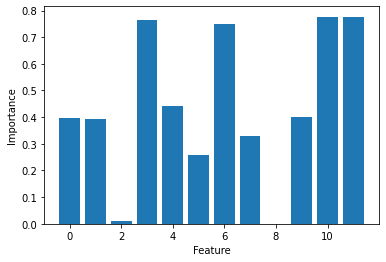

In [ ]:
# calculating the PFI (Permutation Feature Importance) for the SVM model, no downsampling, testing on synthetic data
results = permutation_importance(modelSVM, X_Test_Scaled, Y_Test, scoring = 'precision', n_repeats = 15, random_state = 42)

# getting the average and standard deviation for the importance
importance = results.importances_mean
sd = results.importances_std

# showing results
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
  print('Standard deviation: ', round(sd[i], 5))

# visually representing the results
plt.bar([x for x in range(len(importance))], importance)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

Feature: 0, Score: 0.00090
Standard deviation:  0.00047
Feature: 1, Score: 0.00111
Standard deviation:  0.00052
Feature: 2, Score: -0.00009
Standard deviation:  0.00023
Feature: 3, Score: 0.01130
Standard deviation:  0.00074
Feature: 4, Score: 0.00240
Standard deviation:  0.00069
Feature: 5, Score: 0.00068
Standard deviation:  0.00047
Feature: 6, Score: 0.01212
Standard deviation:  0.00093
Feature: 7, Score: 0.00046
Standard deviation:  0.00037
Feature: 8, Score: 0.00015
Standard deviation:  0.00023
Feature: 9, Score: 0.00123
Standard deviation:  0.00057
Feature: 10, Score: 0.01259
Standard deviation:  0.00084
Feature: 11, Score: 0.01182
Standard deviation:  0.00086


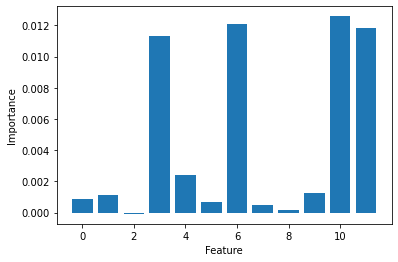

In [ ]:
# calculating the PFI (Permutation Feature Importance) for the SVM model, no downsampling, testing on real data
results = permutation_importance(modelSVM, X_Test_True_Scaled, Y_Test_True, scoring = 'precision', n_repeats = 15, random_state = 42)

# getting the average and standard deviation for the importance
importance = results.importances_mean
sd = results.importances_std

# showing results
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
  print('Standard deviation: ', round(sd[i], 5))

# visually representing the results
plt.bar([x for x in range(len(importance))], importance)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

In [ ]:
# creating a dataframe out of the most important features on the test with real data
I_Test_True = X_Test_True[:, 3]
R_Test_True = X_Test_True[:, 2]
U_Test_True = X_Test_True[:, 0]
J395_Test_True = X_Test_True[:, 6]
J660_Test_True = X_Test_True[:, 10]
J861_Test_True = X_Test_True[:, 11]
Y_Pred_True = modelSVM.predict(X_Test_True_Scaled) # Dados previstos para comparar

important_features_df = pd.DataFrame(dict(U = U_Test_True, R = R_Test_True, I = I_Test_True, J395 = J395_Test_True, J660 = J660_Test_True, J861 = J861_Test_True, TrueBe = Y_Test_True, PredBe = Y_Pred_True, NormPred = NormPred))
important_features_df.to_csv('important_features.csv', index=False)

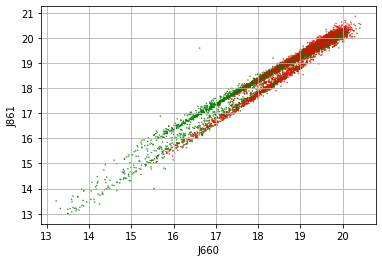

In [ ]:
# creating a diagram to show the stars thought to be Be
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'} # red are Be, green are not
ax.scatter(important_features_df['J660'], important_features_df['J861'], c=important_features_df['PredBe'].map(colors), s=0.2)
ax.grid(True)
plt.xlabel("J660")
plt.ylabel("J861")
plt.savefig('J660xJ861.pdf')
plt.show()

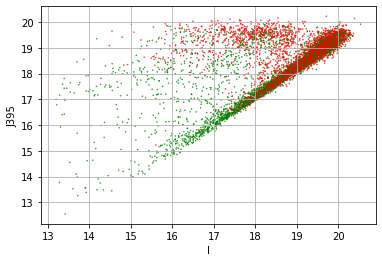

In [ ]:
# creating a diagram to show the stars thought to be Be
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'} # red are Be, green are not
ax.scatter(important_features_df['I'], important_features_df['J395'], c=important_features_df['PredBe'].map(colors), s=0.2)
ax.grid(True)
plt.xlabel("I")
plt.ylabel("J395")
plt.savefig('IxJ395.pdf')
plt.show()

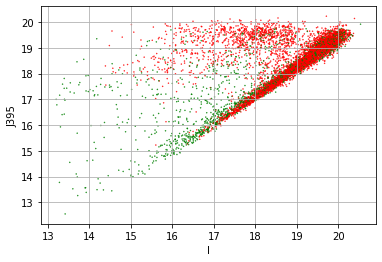

In [ ]:
# creating a diagram to show the stars thought to be Be
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'} # red are Be, green are not
ax.scatter(important_features_df['I'], important_features_df['J395'], c=important_features_df['NormPred'].map(colors), s=0.2)
ax.grid(True)
plt.xlabel("I")
plt.ylabel("J395")
plt.savefig('restrictiveIxJ395.pdf')
plt.show()

In [ ]:
DF_Synth = pd.DataFrame(dict(U = X_Test[:, 0],
                             G = X_Test[:, 1],
                             R = X_Test[:, 2],
                             I = X_Test[:, 3],
                             Z = X_Test[:, 4],
                             J378 = X_Test[:, 5],
                             J395 = X_Test[:, 6],
                             J410 = X_Test[:, 7],
                             J430 = X_Test[:, 8],
                             J515 = X_Test[:, 9],
                             J660 = X_Test[:, 10],
                             J861 = X_Test[:, 11],
                             Be = Y_Test,
                             PredSVM = PredSynthSVM,
                             PredRF = PredSynthRF))
DF_Synth.to_csv('df_synth.csv', index=False)

In [ ]:
DF_True = pd.DataFrame(dict(U = X_Test_True[:, 0],
                            G = X_Test_True[:, 1],
                            R = X_Test_True[:, 2],
                            I = X_Test_True[:, 3],
                            Z = X_Test_True[:, 4],
                            J378 = X_Test_True[:, 5],
                            J395 = X_Test_True[:, 6],
                            J410 = X_Test_True[:, 7],
                            J430 = X_Test_True[:, 8],
                            J515 = X_Test_True[:, 9],
                            J660 = X_Test_True[:, 10],
                            J861 = X_Test_True[:, 11],
                            Be = Y_Test_True,
                            PredSVM = PredTrueSVM,
                            PredSVMCalib = NormPred,
                            PredNB = PredTrueNB))
DF_True.to_csv('df_true.csv', index=False)